In [1]:
import pandas as pd 

# Load data & inspection

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE | NASSIM/Virtual experiences/British Airways_Data science/Task 2/customer_booking.csv',encoding="ISO-8859-1")

In [3]:
df


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# Data engineering and modeling

In [5]:
from sklearn.preprocessing import LabelEncoder

# Creat the LabelEncoder instance
label_encoder = LabelEncoder()

# Adapte and transforme the values of the colomn route
df['route'] = label_encoder.fit_transform(df['route'])
# Get correspondances between original values and encoded values
correspondances_route = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


# Adapte and transforme the values of the colomn flight_day
df['flight_day'] = label_encoder.fit_transform(df['flight_day'])
# Get correspondances between original values and encoded values
correspondances_flight_day = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


# Adapte and transforme the values of the colomn trip_type
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])
# Get correspondances between original values and encoded values
correspondances_trip_type = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Adapte and transforme the values of the colomn sales_channel
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
# Get correspondances between original values and encoded values
correspondances_sales_channel = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


# Adapte and transforme the values of the colomn booking_origin
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])
# Get correspondances between original values and encoded values
correspondances_booking_origin = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [6]:
df['flight_day'].unique()

array([2, 6, 4, 1, 3, 5, 0])

In [7]:
# This function allows to know which the correspendence between the origine value and the encoded value
def correspondances(x,codage):
    for valeur_encodee, valeur_origine in x.items():
      if valeur_encodee == codage :
        print(f"{valeur_encodee} est remplacé par {valeur_origine}")
      else :continue

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


* Now all the data is complet end converted from string to int, so we are ready to implement the model 

In [9]:
x = df.drop(columns='booking_complete')
y = df['booking_complete']

print(x.shape)
print(y.shape)

(50000, 13)
(50000,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Application of model and validation :

In [11]:
scores = []

for fold in range(0, 10):
    # Instantiate algorithm
    model = RandomForestClassifier()
    scaler = StandardScaler()

    # Create training and test samples
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

    # Scale X data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    trained_model = model.fit(X_train, y_train)

    # Calculate score on test sample
    score = trained_model.score(X_test, y_test)
    scores.append(score)
    print(f"Fold {fold + 1}: Score = {score:.3f}")

print(f"Average Score: {(sum(scores) / len(scores)):.2f}")

Fold 1: Score = 0.853
Fold 2: Score = 0.854
Fold 3: Score = 0.853
Fold 4: Score = 0.854
Fold 5: Score = 0.854
Fold 6: Score = 0.855
Fold 7: Score = 0.854
Fold 8: Score = 0.853
Fold 9: Score = 0.853
Fold 10: Score = 0.854
Average Score: 0.85


* We notice that for each fold we have the same score which means the good performance of our model, and we can predict the target 85% true 

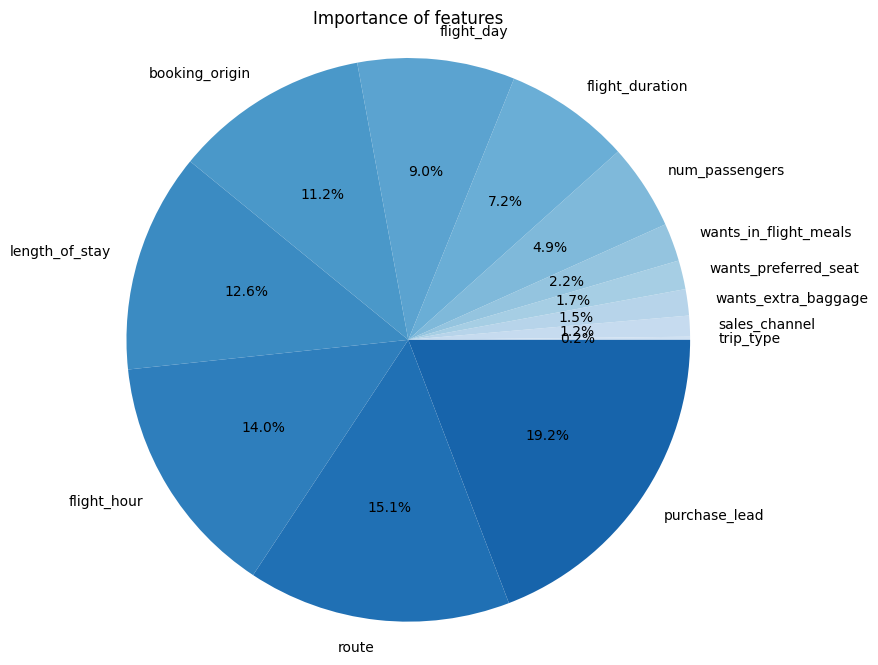

In [24]:
import matplotlib.pyplot as plt
import numpy as np
# Get the score importance of features
feature_importances = model.feature_importances_
features = [i.split("__")[0] for i in x.columns]
indices = np.argsort(feature_importances)
labels = [features[i] for i in indices]


colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(feature_importances)))


# representation pie of the importances
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Importance of features')
plt.pie(feature_importances[indices], labels=labels,colors =colors, autopct='%1.1f%%')
plt.axis('equal')  # Pour obtenir un cercle parfait
plt.show()